I am plotting the detail of the time series of the accumulated energy delivered at the main point of each generation source.

- if I consider the power_down to power_up as accounted for, how does the coverage change?  does this show data outages?  is this important?
- the power down and up messages imply a greater uptime than we have samples to support.  does that mean we have lost timestamp data?  is this worth chasing down?
- are there samples between power up and power down?
- note: there is data missing on the month boundaries.  this missing data would cause an overestimate of blackouts and an underestimate of uptime using the timestamp data.  we could restrict our analysis to within each data file to remove this issue.
- what fraction of the discrepancy is caused by these month boundaries?
- what steps do I take next?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import WP19_analysis as wpa
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = {}
for rfd in wpa.raw_file_data:
    energy = wpa.load_timeseries_file(rfd['village_name'] + '-clean.csv')
    start_date = energy.index[0]
    end_date = energy.index[-1]
    duration = (end_date - start_date)/np.timedelta64(1,'D')
    expected_samples = duration * 24 * 60
    num_samples = len(energy)
    coverage = num_samples / expected_samples
    #print(duration)
    data[rfd['village_name']] = {'start_date':energy.index[0],
                                 'end_date':energy.index[-1],
                                 'duration':duration,
                                 'expected_samples':expected_samples,
                                 'num_samples':num_samples,
                                 'coverage':coverage}
pd.DataFrame(data).T
#data

,coverage,duration,end_date,expected_samples,num_samples,start_date
ajau,0.960473,128.481,2015-08-28 11:32:00,185012,177699,2015-04-22 00:00:00
asei,0.915481,78.6889,2015-07-09 16:32:00,113312,103735,2015-04-22 00:00:00
atamali,0.190402,124.065,2015-08-26 19:20:00,178654,34016,2015-04-24 17:46:00
ayapo,0.232503,127.433,2015-08-27 22:17:00,183503,42665,2015-04-22 11:54:00
kensio,0.0893449,102.194,2015-08-21 22:57:00,147160,13148,2015-05-11 18:17:00


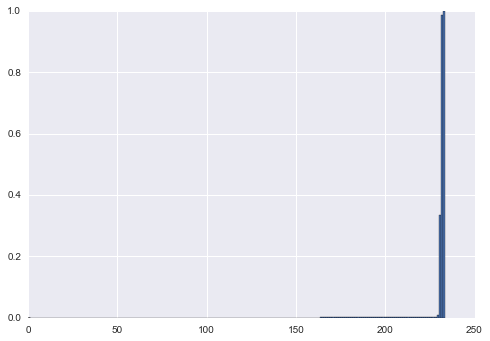

In [27]:
energy['Avg Voltage L1/L12'].hist(cumulative=True, bins=200, normed=True)

In [17]:
energy

,Unnamed: 0,Unnamed: 1,kWh export,Avg Voltage L1/L12,Avg Voltage L2/L23,Avg Voltage L3/L31,Avg Current L1,Avg Current L2,Avg Current L3,kVA sliding window Demand,Maximum real-time Total kVA,Trigger
Timestamp,,,,,,,,,,,,
2015-05-11 18:17:00,2067,NaN,0,233.4,232.0,233.0,4.26,7.23,5.91,0.000,0.709,1.0
2015-05-11 18:18:00,2066,NaN,0,233.4,231.9,232.8,4.44,7.51,6.01,0.000,0.661,1.0
2015-05-11 18:19:00,2065,NaN,0,233.3,231.7,232.4,4.56,7.68,5.82,0.000,0.798,1.0
2015-05-11 18:20:00,2064,NaN,0,233.2,231.6,232.1,4.52,7.62,5.75,0.000,0.762,1.0
2015-05-11 18:21:00,2063,NaN,0,232.5,231.4,231.7,5.54,7.67,5.86,0.000,0.562,1.0
2015-05-11 18:22:00,2062,NaN,0,232.5,231.4,231.6,5.57,7.64,5.85,0.000,0.554,1.0
2015-05-11 18:23:00,2061,NaN,0,232.4,231.3,231.5,5.57,7.91,5.88,0.000,0.610,1.0
2015-05-11 18:24:00,2060,NaN,0,232.5,231.3,231.3,5.80,7.97,5.84,0.000,0.589,1.0
2015-05-11 18:25:00,2059,NaN,0,231.8,231.5,231.1,6.14,6.50,5.55,0.000,0.215,1.0


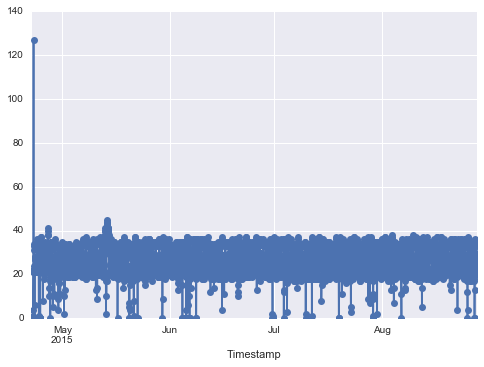

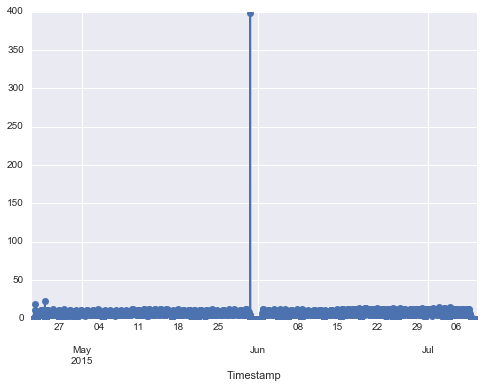

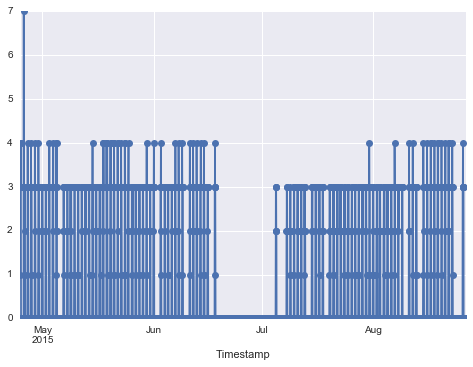

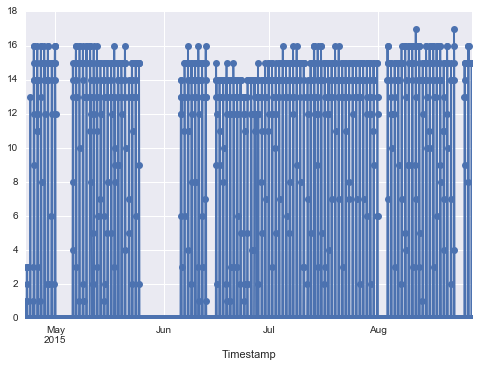

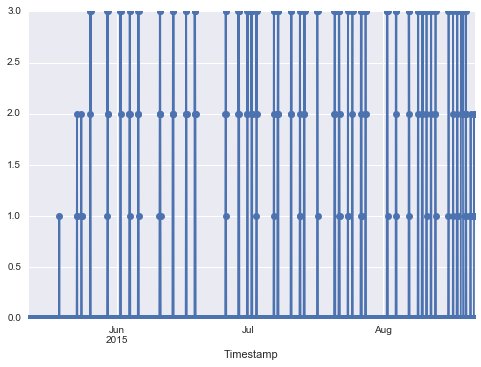

In [27]:
data = {}
for rfd in wpa.raw_file_data:
    # get durations from message file
    energy = wpa.load_timeseries_file(rfd['village_name'] + '-clean.csv')
    fig, ax = plt.subplots()
    # get daily energy
    daily_energy = energy['kWh export'].resample('h').bfill().diff()
    #print(daily_energy.describe())
    daily_energy.plot(ax=ax, marker='o')
    #energy['kWh export'].plot(ax=ax)
    #ax.set_title(rfd['village_name'])